<a href="https://colab.research.google.com/github/renatalucia/KaggleTPSApril21/blob/main/KagglePlaygroundApril21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from Kaggle

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=9b06c4271bc59670bc0a4f460d6d664864e9039128ecad6c100c55a323c8e997
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"renatalucia","key":"7f35d1eff8235434d4449562279d1adb"}'}

In [3]:
#Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

#Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c tabular-playground-series-apr-2021

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!ls /content

kaggle.json  sample_data  sample_submission.csv  test.csv.zip  train.csv.zip


In [13]:
#!unzip /content/tabular-playground-series-apr-2021.zip -d playground
!unzip /content/train.csv.zip -d playground
!unzip /content/test.csv.zip -d playground

Archive:  /content/train.csv.zip
  inflating: playground/train.csv    
Archive:  /content/test.csv.zip
  inflating: playground/test.csv     


# Exploratory Data Analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_train = pd.read_csv('/content/playground/train.csv')
print(df_train.columns)
print(len(df_train.columns))
print(df_train.head(100))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
12
    PassengerId  Survived  Pclass  ...    Fare   Cabin  Embarked
0             0         1       1  ...   27.14  C12239         S
1             1         0       3  ...   13.35     NaN         S
2             2         0       3  ...   71.29     NaN         S
3             3         0       3  ...   13.04     NaN         S
4             4         1       3  ...    7.76     NaN         S
..          ...       ...     ...  ...     ...     ...       ...
95           95         1       2  ...   32.24     NaN         S
96           96         1       2  ...   26.46     NaN         Q
97           97         1       1  ...  131.28   D7415         Q
98           98         1       2  ...   27.88     NaN         S
99           99         1       1  ...  278.56  C16097         C

[100 rows x 12 columns]


In [18]:
df_test = pd.read_csv('/content/playground/test.csv')
print(df_test.columns)
print(len(df_test.columns))
print(df_test.head(100))

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
11
    PassengerId  Pclass              Name  ...   Fare   Cabin  Embarked
0        100000       3  Holliday, Daniel  ...  63.01     NaN         S
1        100001       3  Nguyen, Lorraine  ...   5.81     NaN         S
2        100002       1   Harris, Heather  ...  38.91  B15315         C
3        100003       2      Larsen, Eric  ...  12.93     NaN         S
4        100004       1     Cleary, Sarah  ...  26.89  B22515         C
..          ...     ...               ...  ...    ...     ...       ...
95       100095       3     Guzma, Donald  ...   8.48     NaN         S
96       100096       3     Mclean, Robin  ...  12.76     NaN         C
97       100097       2    Lopez, Darlene  ...   6.17     NaN         S
98       100098       3     Tobe, Enrique  ...  11.64  A10911         S
99       100099       3   Ricker, Matthew  ...  31.12     NaN   

In [19]:
print(df_train.shape)
print(df_test.shape)

(100000, 12)
(100000, 11)


In [20]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 1000)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


## Missing values

In [21]:
# Check missing values
print('Missing values per columns in train dataset')
xlabels = []
yvalues = []
y2values = []
n_train = len(df_train)
n_test = len(df_test)
for col in df_train.columns:
    temp_col = df_train[col].isnull().sum()
    if col!="Survived":
      xlabels.append(col)
      yvalues.append(temp_col /n_train)
      print(f"{col}: {temp_col}")
print()
print('Missing values per columns in test dataset')
for col in df_test.columns:
    temp_col = df_test[col].isnull().sum()
    y2values.append(temp_col /n_test)
    print(f"{col}: {temp_col}")

Missing values per columns in train dataset
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3292
SibSp: 0
Parch: 0
Ticket: 4623
Fare: 134
Cabin: 67866
Embarked: 250

Missing values per columns in test dataset
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3487
SibSp: 0
Parch: 0
Ticket: 5181
Fare: 133
Cabin: 70831
Embarked: 277


### Plot missing values for train and test datasets

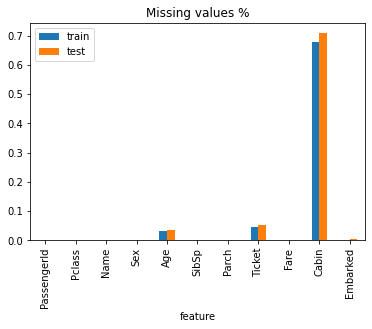

In [22]:
# Plot chart
df = pd.DataFrame({
      'feature': xlabels,
      'train': yvalues,
      'test': y2values
      
  })
df.plot(x='feature',
        kind="bar",
        title = "Missing values %")
plt.show()

## Feature distributions for train and test datasets

In [23]:
# Features "PassengerId", "Name" and "Ticket" are not considered 
# because they are specific for each passenger. Since their values 
# do not coincide in train and test datasets there is not much to 
# learn from them.

# Cabin will not be used because of the huge amount of null values.

# Survived is the target feature.

### Plot distributions of features with categorical values



In [24]:
# count occurrences of each feature value (train dataset)
df_counts_train = {}
for col in df_train.columns:
  
  if col in ["PassengerId", "Survived", "Name", "Ticket"]:
    continue

  s = df_train[col].value_counts()
  df_feat_dist = pd.DataFrame({col: s.index, "sum":s.values})
  df_counts_train[col] = df_feat_dist


In [25]:
# count occurrences of each feature value (test dataset)
df_counts_test = {}
for col in df_test.columns:
  
  if col in ["PassengerId", "Survived", "Name", "Ticket"]:
    continue

  s = df_test[col].value_counts()
  df_feat_dist = pd.DataFrame({col: s.index, "sum":s.values})
  df_counts_test[col] = df_feat_dist

Pclass
Sex
Age
SibSp
Parch
Fare
Cabin
Embarked


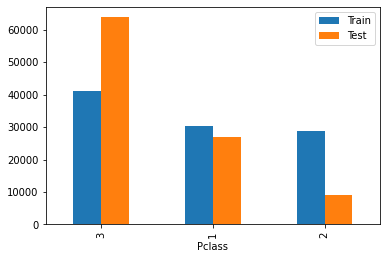

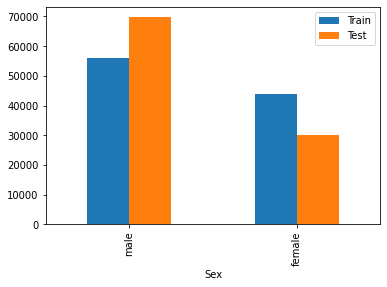

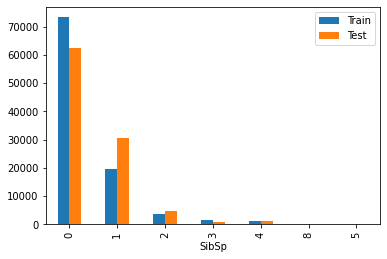

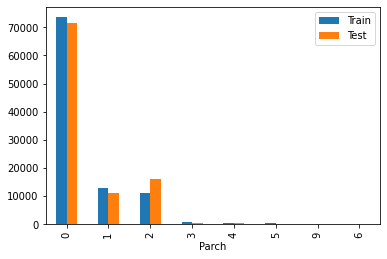

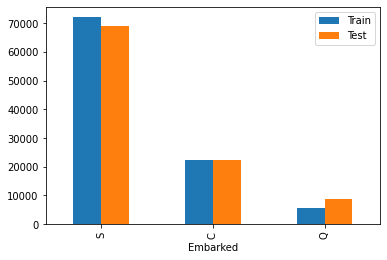

In [26]:

# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt

for col, df in df_counts_train.items():

  print(col)

  if col not in  ["Sex", "Pclass", "SibSp","Parch", 
                 "Embarked"]:
    continue

  xlabels = []
  y1values = []
  y2values = []
  for item in df_counts_train[col][col]:
    xlabels.append(item)

    y1values.append(df_counts_train[col].loc[df_counts_train[col][col]==item]["sum"].item())

    y2values.append(df_counts_test[col].loc[df_counts_test[col][col]==item]["sum"].item())

  # creating dataframe
  df = pd.DataFrame({
      col: xlabels,
      'Train': y1values,
      'Test': y2values
  })
    
  # plotting graph 
  df.plot(x=col, y=["Train", "Test"], kind="bar")

### Plot distribution of features with real values

The probability density function of each feature is estimated using KDE (Kernel Density Estimation) 

In [27]:
df_age = pd.concat([df_train["Age"], df_test["Age"]], keys=["train", "test"], names=['type', 'rowid']).reset_index()
df_fare = pd.concat([df_train["Fare"], df_test["Fare"]], keys=["train", "test"], names=['type', 'rowid']).reset_index()

type
test     AxesSubplot(0.125,0.125;0.775x0.755)
train    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

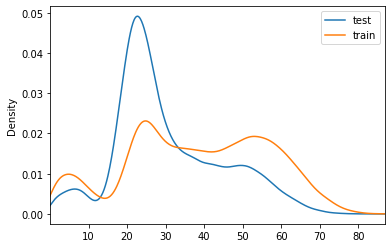

In [28]:
df_age.groupby('type').Age.plot(kind='kde', legend=True, xlim= [df_age["Age"].min(), df_age["Age"].max()])

type
test     AxesSubplot(0.125,0.125;0.775x0.755)
train    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

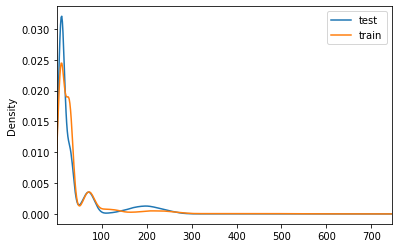

In [29]:
df_fare.groupby('type').Fare.plot(kind='kde', legend=True, xlim= [df_fare["Fare"].min(), df_fare["Fare"].max()])

## Distribution of target feature (Survived)

In [30]:
df_dist = df_train["Survived"].value_counts()
print(df_dist)
print()
print("Not Survived: " + str(np.array(df_dist)[0]/np.array(df_dist).sum()) + "%")
print("Survived: " + str(np.array(df_dist)[1]/np.array(df_dist).sum()) + "%")

0    57226
1    42774
Name: Survived, dtype: int64

Not Survived: 0.57226%
Survived: 0.42774%


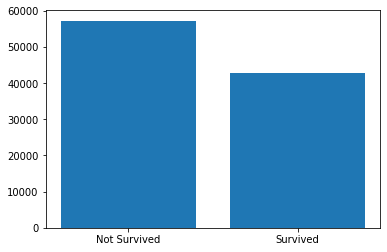

In [31]:
plt.bar(["Not Survived","Survived"], np.array(df_dist))
plt.show()

## Survival rates according to parameters 


### Parameters with categorical values

Two charts are plotted for each feature.

The first chart compares survival and non-survival rates. 

The second chart shows survival rates given that a passenger belongs to a certain class.

Take the "Sex" charts as example. The fisrt shows that around 30% of the passengers that survived are female. The second chart shows that around 70% of the females survived.


In [32]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

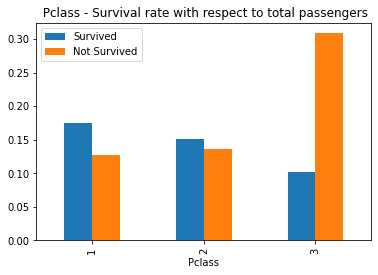

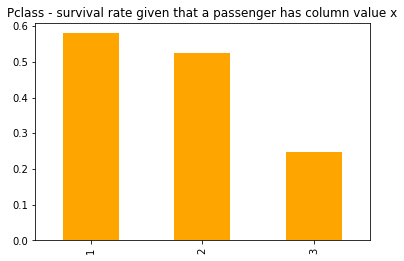

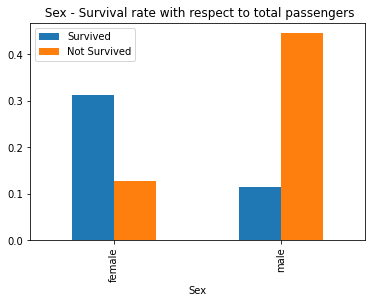

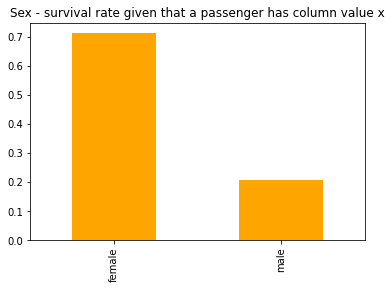

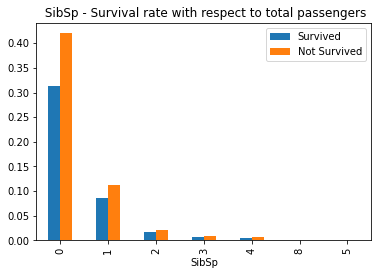

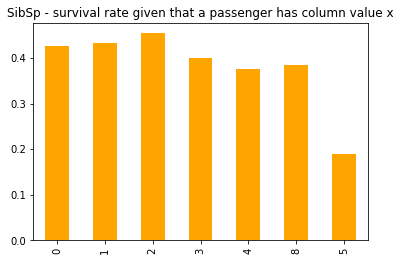

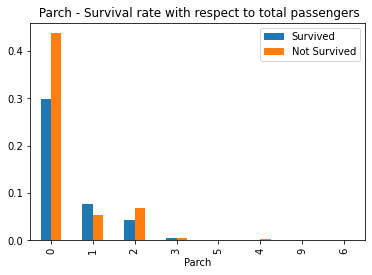

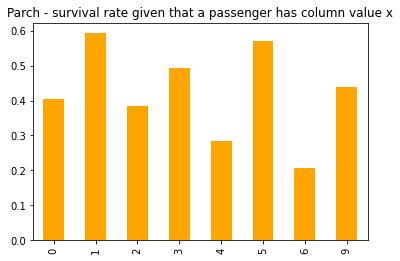

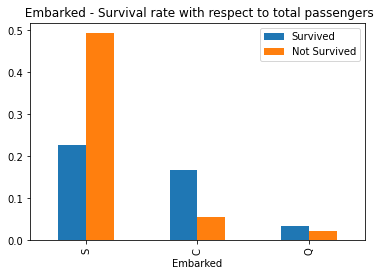

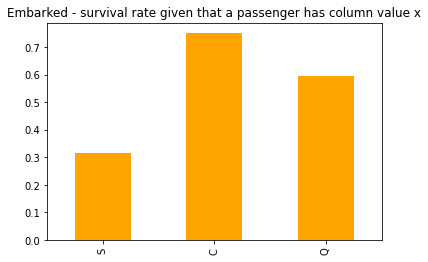

In [33]:
total_pessengers = len(df_train)
for col in df_train.columns:

  if col not in  ["Sex", "Pclass", "SibSp","Parch", 
                 "Embarked"]:

    continue

  
  df_survived = df_train.loc[df_train['Survived'] == 1][col].value_counts()
  df_survived_perc = df_survived / total_pessengers
  df_not_survived = df_train.loc[df_train['Survived'] == 0][col].value_counts()
  df_not_survived_perc = df_not_survived / total_pessengers


  xlabels = []
  y1values = []
  y2values = []
  for k, v in df_survived_perc.items():
    xlabels.append(k)
    y1values.append(df_survived_perc[k])
    y2values.append(df_not_survived_perc[k])

  df = pd.DataFrame({
      col: xlabels,
      'Survived': y1values,
      'Not Survived': y2values
  })

  df.plot(x=col, 
          y=["Survived", "Not Survived"], 
          kind="bar",
          title=" {} - Survival rate".format(col) +
            " with respect to total passengers")
  plt.show()

  df_total = df_train[col].value_counts()

  df_survived_perc = df_survived / df_total
  df_survived_perc.plot(x=df_survived_perc.values, 
                        y=np.array(df_survived_perc.index), 
                        kind="bar", 
                        color = "orange",
                        title="{} - survival rate".format(col)+
                          " given that a passenger has column value x")
  plt.show()
  print()

### Parameters with real values

The probability density function of each feature is estimated using KDE (Kernel Density Estimation)

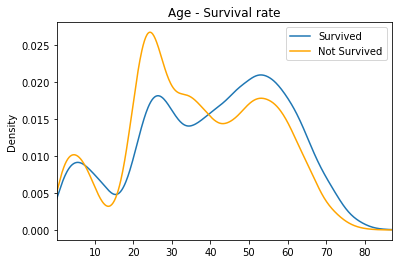

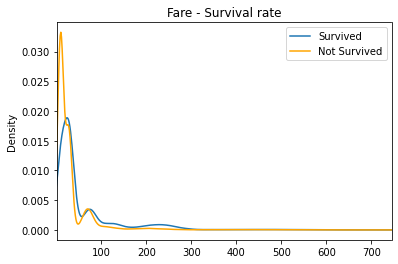

In [34]:
for col in ["Age", "Fare"]:
  df_train.loc[df_train["Survived"]==1][col].plot(
      kind='kde', 
      legend=True, 
      label = "Survived",
      xlim = [df_train[col].min(), 
      df_train[col].max()],
      title = "{} - Survival rate".format(col)
  )
  
  df_train.loc[df_train["Survived"]==0][col].plot(kind='kde', 
                                               legend=True, 
                                               color = "orange",
                                               label = "Not Survived",
                                               xlim= [df_train[col].min(), 
                                                      df_train[col].max()])
  plt.show()

## Search best features for the classification problem



From the charts above features "Sex", "Pclass", "Embarked", "Fare" and "Age" seem to be most correlated to the target feature (survived).

Let's check this more precesiley using a statistical test in the following. 

Missing values are treated here are a separate class

### Categorical columns preprocessing

In [35]:
df_train["Sex"] = pd.Categorical(df_train["Sex"])
df_train["Sex"] = np.array(df_train.Sex.cat.codes)

In [36]:
df_train["Embarked"] = pd.Categorical(df_train["Embarked"])

# Add 1 because NAN was map to -1
df_train["Embarked"] = np.array(df_train.Embarked.cat.codes + 1)

In [37]:
df_train["Ticket"] = pd.Categorical(df_train["Ticket"])

# Add 1 because NAN was map to -1
df_train["Ticket"] = np.array(df_train.Ticket.cat.codes + 1)

In [38]:
x_train = np.array(df_train[["PassengerId", "Ticket",  
                             "Fare", "Pclass", "SibSp","Parch", 
                             "Embarked", "Sex", "Age"]].fillna(0))

feature_names = ["PassengerId", "Ticket",  
                 "Fare", "Pclass", "SibSp","Parch", 
                 "Embarked" , "Sex", "Age"]

In [39]:
x_train

array([[0.0000e+00, 1.0358e+04, 2.7140e+01, ..., 3.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.7044e+04, 1.3350e+01, ..., 3.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+00, 5.9885e+04, 7.1290e+01, ..., 3.0000e+00, 1.0000e+00,
        3.3000e-01],
       ...,
       [9.9997e+04, 0.0000e+00, 9.9500e+00, ..., 3.0000e+00, 1.0000e+00,
        3.7000e+01],
       [9.9998e+04, 4.3481e+04, 3.0920e+01, ..., 3.0000e+00, 1.0000e+00,
        5.1000e+01],
       [9.9999e+04, 4.3335e+04, 1.3960e+01, ..., 3.0000e+00, 1.0000e+00,
        5.5000e+01]])

In [40]:
y_train = np.array(df_train["Survived"])

### Compute a score for each feature

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Using ANOVA F-value between label/feature for classification tasks.
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(x_train, y_train)


SelectKBest(k='all', score_func=<function f_classif at 0x7f187f41fd40>)

In [42]:
d_scores = {}
for i in range(len(fs.scores_)):
  d_scores[feature_names[i]] = fs.scores_[i]
	#print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))

for k,v in dict(sorted(d_scores.items(), 
                       key=lambda item: item[1], reverse=True)).items():
  print(k,v)
  

Sex 34645.49063366199
Embarked 15647.226737548941
Pclass 9162.873064643562
Fare 3635.9915476356564
Age 962.1035380366604
Ticket 185.0972742482985
Parch 54.55956330400394
SibSp 5.756985323818044
PassengerId 0.3824200551630611


The scores confirmed what one could already see on the charts showing survival rates according to parameters. Parameters *Sex*, *Embarked*, *Pclass*, *Fare* and *Age* are most corelated to the target feature.

# Classification Model

* A feedfoward neural network on Tensorflow was 
trained to perform the classification test.

* Intially the best 5 features were used as input, but the performance was not increased compared to using only the first three best. Therefore the input vector will have dimension 3. The features used as input are: Sex, Embarked, Pclass.

* The networked architecure was selected after training different options and consists simply of 1 hidden layer and one output layer.


In [44]:
import tensorflow as tf

In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [46]:
print(tf.__version__)

2.4.1


## Readind Dataset and formating for training

In [75]:
df_train = pd.read_csv('/content/playground/train.csv')
print(df_train.columns)
print(len(df_train.columns))
print(df_train.head(100))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
12
    PassengerId  Survived  Pclass              Name     Sex    Age  SibSp  Parch     Ticket    Fare   Cabin Embarked
0             0         1       1  Oconnor, Frankie    male    NaN      2      0     209245   27.14  C12239        S
1             1         0       3       Bryan, Drew    male    NaN      0      0      27323   13.35     NaN        S
2             2         0       3    Owens, Kenneth    male   0.33      1      2  CA 457703   71.29     NaN        S
3             3         0       3     Kramer, James    male  19.00      0      0   A. 10866   13.04     NaN        S
4             4         1       3     Bond, Michael    male  25.00      0      0     427635    7.76     NaN        S
..          ...       ...     ...               ...     ...    ...    ...    ...        ...     ...     ...      ...
95           95         1       2     

In [76]:
# Encode Categorical Values
df_train["Sex"] = pd.Categorical(df_train["Sex"])
df_train["Sex"] = np.array(df_train.Sex.cat.codes)
df_train["Embarked"] = pd.Categorical(df_train["Embarked"])
df_train["Embarked"] = np.array(df_train.Embarked.cat.codes)

# Create Dataset
X = np.array(df_train[["Sex", "Embarked", "Pclass"]])
labels = np.array(df_train["Survived"])

In [77]:
X

array([[1, 2, 1],
       [1, 2, 3],
       [1, 2, 3],
       ...,
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [78]:
# Imputation of nan values
df_train['Embarked'] = df_train['Embarked'].replace(-1, np.nan)
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = imputer.fit_transform(X)

In [79]:
print(np.isnan(X).any())

False


In [80]:
# Split into train and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X, labels, test_size=0.33)

## Define and compile Classification model

In [81]:
# Define the model
model = Sequential()
model.add(Dense(20, 
                kernel_initializer='random_normal',
                bias_initializer='zeros',
                input_dim=3, 
                kernel_regularizer=tf.keras.regularizers.l2(0.01),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
#opt = tf.optimizers.Adam(learning_rate=0.00001)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [86]:
history = model.fit(X_train, 
          y_train, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          validation_split=0.2
          # validation_data=(X_valid, y_valid)
)

Epoch 1/10
1675/1675 [==============================] - 3s 1ms/step - loss: 0.5796 - accuracy: 0.6935 - val_loss: 0.5138 - val_accuracy: 0.7640
Epoch 2/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5150 - accuracy: 0.7641 - val_loss: 0.5157 - val_accuracy: 0.7640
Epoch 3/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5179 - accuracy: 0.7600 - val_loss: 0.5110 - val_accuracy: 0.7616
Epoch 4/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5092 - accuracy: 0.7659 - val_loss: 0.5098 - val_accuracy: 0.7640
Epoch 5/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5126 - accuracy: 0.7658 - val_loss: 0.5093 - val_accuracy: 0.7616
Epoch 6/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5103 - accuracy: 0.7630 - val_loss: 0.5074 - val_accuracy: 0.7616
Epoch 7/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5112 - accuracy: 0.7629 - val_loss: 0.5084 - val_accuracy:

## Evaluate the model on validation data

In [87]:
loss = model.evaluate(X_valid, y_valid, verbose=0)
print(loss)

[0.5046737194061279, 0.7673333287239075]


## Make predictions os validation data

In [ ]:
y_valid

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
yhat = model.predict(X_valid)
print(yhat)

[[0.41861227]
 [0.2769578 ]
 [0.5777548 ]
 ...
 [0.29545367]
 [0.5777548 ]
 [0.45967266]]


In [ ]:
y_valid

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
y_class = np.where(yhat > 0.5, 1, 0)


In [ ]:
y_class = y_class.squeeze()

In [ ]:
y_class

array([0, 0, 1, ..., 0, 1, 0])

# Predict Labels on Test Set

In [ ]:
df_test = pd.read_csv('/content/playground/test.csv')
print(df_test.columns)
print(len(df_test.columns))
print(df_test.head())

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
11
   PassengerId  Pclass              Name     Sex   Age  SibSp  Parch  Ticket   Fare   Cabin Embarked
0       100000       3  Holliday, Daniel    male  19.0      0      0   24745  63.01     NaN        S
1       100001       3  Nguyen, Lorraine  female  53.0      0      0   13264   5.81     NaN        S
2       100002       1   Harris, Heather  female  19.0      0      0   25990  38.91  B15315        C
3       100003       2      Larsen, Eric    male  25.0      0      0  314011  12.93     NaN        S
4       100004       1     Cleary, Sarah  female  17.0      0      2   26203  26.89  B22515        C


In [ ]:
# Preprocessing categorical data
df_test["Sex"] = pd.Categorical(df_test["Sex"])
df_test["Sex"] = np.array(df_test.Sex.cat.codes)
df_test["Embarked"] = pd.Categorical(df_test["Embarked"])
df_test["Embarked"] = np.array(df_test.Embarked.cat.codes)

In [ ]:
# Create Dataset
X = np.array(df_test[["Sex", "Embarked", "Pclass"]])

In [ ]:
# Imputation of nan values
df_train['Embarked'] = df_train['Embarked'].replace(-1, np.nan)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = imputer.fit_transform(X)

In [ ]:
df_test.isnull().any()

In [ ]:
# Create Test Dataset
X_test = np.array(df_test[["Sex", "Embarked", "Pclass"]])
PIds = np.array(df_test["PassengerId"])


In [ ]:
Y_hat = model.predict(X_test) 
Y_class = np.where(Y_hat > 0.5, 1, 0)

In [ ]:
df_classif = pd.DataFrame(data=[PIds, Y_class.squeeze()]).T
df_classif.columns = ["PassengerId", "Survived"]

In [ ]:
df_classif.head()

In [ ]:
# Save file to submit
df_classif.to_csv("classifications.csv", index=False)

# Draft

In [ ]:
# optional model
# create an instance of a neural network:
k_model = Sequential()
n = 3
# the first hidden layer must have input dimensions:
k_model.add(Dense(10, activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01),
                  input_dim=n))
# additional hidden layers are optional:
k_model.add(Dense(20, activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# the output layer- a binary classifier w/sigmoid activation:
k_model.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Compile the model with Adam optimizer:
k_model.compile(#optimizer=Adam(lr=1e-1),
                optimizer="adam",
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Define a learning rate decay method:
#lr_decay = ReduceLROnPlateau(monitor='loss',
#                             patience=1,
#                             verbose=0,
#                             factor=0.5,
#                             min_lr=1e-7)
# Train the model:
k_model.fit(X_train, 
            y_train, 
            epochs=20,
            #callbacks=[lr_decay], 
            verbose=1,
            validation_data=(X_valid, y_valid)
            )